# Project 2C

##### Kendal Johnson-Ellenbeck Python Group 8

#### Scientific Question: How does exclusively breastfeeding affect the diversity of bacterium, like Bacteroidetes and Firmicutes, in the gut microbiome, what is the correlation with the development of diarrhea-related gut microbiota dysbiosis? 

#### Scientific Hypothesis: If infants are exclusively breastfed, then they will have a lower amount of Bacteroidetes and Firmicutes in infants’ gut microbiome which correlates with a reduced amount of diarrhea-related gut microbiota dysbiosis. 

# P-value, Deep neural network, Scatter Plot

### Part 1: Load the Packages

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import scipy.stats as stats

In [5]:
import matplotlib.pyplot as plt

In [6]:
import math

In [7]:
from numpy import loadtxt

In [21]:
from keras.models import Sequential

In [22]:
from keras.layers import Dense

### Part 2A: P-Value to Identify Difference in Diversity Between Exclusively Breastfed and Non-Exclusively Breastfed Infants 

In [19]:
column_subset = ['sampleid', 'personid','age.sample','bf','author','year','pop','gender','chao1','observed_species','pd_whole_tree','shannon']

In [10]:
df = pd.read_csv('alphamha.csv')

In [11]:
df.head()

,Unnamed: 0,sampleid,personid,age.sample,bf,author,year,pop,gender,chao1,observed_species,pd_whole_tree,shannon
0,1,ha.2001b.stl,ha.1,1.166667,Non_exclusiveBF,Bender et al,2016,Haiti,Female,785.257957,350.7,21.405708,3.386680
1,2,ha.2002b.stl,ha.2,1.200000,Non_exclusiveBF,Bender et al,2016,Haiti,Female,1357.640219,743.8,33.101089,3.550587
2,3,ha.2003b.stl,ha.3,2.033333,ExclusiveBF,Bender et al,2016,Haiti,Male,1741.338006,894.0,35.768192,4.539025
3,4,ha.2004b.stl,ha.4,2.566667,ExclusiveBF,Bender et al,2016,Haiti,Male,1180.861131,648.7,44.464663,4.424287
4,5,ha.2005b.stl,ha.5,4.533333,ExclusiveBF,Bender et al,2016,Haiti,Female,1227.344739,676.9,27.732586,4.436616


In [12]:
df.sort_values('bf',kind= 'mergesort')

,Unnamed: 0,sampleid,personid,age.sample,bf,author,year,pop,gender,chao1,observed_species,pd_whole_tree,shannon
2,3,ha.2003b.stl,ha.3,2.033333,ExclusiveBF,Bender et al,2016,Haiti,Male,1741.338006,894.0,35.768192,4.539025
3,4,ha.2004b.stl,ha.4,2.566667,ExclusiveBF,Bender et al,2016,Haiti,Male,1180.861131,648.7,44.464663,4.424287
4,5,ha.2005b.stl,ha.5,4.533333,ExclusiveBF,Bender et al,2016,Haiti,Female,1227.344739,676.9,27.732586,4.436616
5,6,ha.2006b.stl,ha.6,3.200000,ExclusiveBF,Bender et al,2016,Haiti,Female,716.576901,468.9,37.306465,3.077295
7,8,ha.2008b.stl,ha.8,0.266667,ExclusiveBF,Bender et al,2016,Haiti,Female,944.915525,577.8,28.906562,4.088268
8,9,ha.2009b.stl,ha.9,1.600000,ExclusiveBF,Bender et al,2016,Haiti,Female,1841.338704,923.9,61.460668,5.771111
9,10,ha.2010b.stl,ha.10,0.566667,ExclusiveBF,Bender et al,2016,Haiti,Male,1811.259007,929.5,62.723459,5.549647
10,11,ha.2011b.stl,ha.11,2.000000,ExclusiveBF,Bender et al,2016,Haiti,Female,408.026367,324.0,22.762086,3.107492
11,12,ha.2012b.stl,ha.12,0.200000,ExclusiveBF,Bender et al,2016,Haiti,Female,848.951576,520.3,30.169673,4.231786
12,13,ha.2013b.stl,ha.13,4.000000,ExclusiveBF,Bender et al,2016,Haiti,Female,1044.073353,563.5,24.682932,4.102794


In [13]:
diversity = df['shannon']

In [15]:
ebf = (diversity[0:30])
nebf = (diversity[35:45])

In [17]:
print(np.var(ebf))
print(np.var(nebf))

0.8039328146954289
1.1801340812813745


In [18]:
stats.ttest_ind(a=ebf,b=nebf,equal_var=True)

Ttest_indResult(statistic=-2.2036207242596397, pvalue=0.033683740933259335)

This data gives a p-value of .034. This p-value is less than the significance value of 0.05. This means that the null hypothesis (Exclusive BF and Non-Exclusive BF have the same diversity) is false, and the alternate hypothesis (Exclusive BF and Non-Exclusive breastfeeding have different ranges of diveristy) is accepted. It is shown the diversity in the non-exclusive breastfed group is larger than the exclusively breast fed group. 

### Part 2B: Deep Neural Network to Show Correlation Between Breastfeeding and Development of Diarrhea Dysbiosis

https://www.datacamp.com/community/tutorials/deep-learning-python, https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ = references

In [23]:
data= pd.read_csv('alphamrm.csv')

In [24]:
dn= pd.DataFrame(data, columns=['breast.milk','formula1','solid.foods2','diarrhea','antibiotics'])

In [25]:
dn.replace(('Yes','No'),(1,0),inplace=True)

In [26]:
print(dn)

     breast.milk  formula1  solid.foods2  diarrhea  antibiotics
0              1         0             0         0            0
1              1         0             1         0            0
2              1         0             1         0            0
3              1         0             1         0            0
4              1         0             1         0            0
..           ...       ...           ...       ...          ...
990            1         1             0         0            0
991            1         1             0         0            0
992            1         1             0         1            0
993            1         1             1         0            0
994            0         1             1         0            0

[995 rows x 5 columns]


In [27]:
dn.head()

,breast.milk,formula1,solid.foods2,diarrhea,antibiotics
0,1,0,0,0,0
1,1,0,1,0,0
2,1,0,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0


In [28]:
X=dn[dn.columns[0:3]]

In [29]:
y= dn[dn.columns[3]]

In [30]:
model = Sequential()

In [31]:
model.add(Dense(12, input_dim=3, activation='relu'))

In [32]:
model.add(Dense(8, activation='relu'))

In [33]:
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model.fit(X,y,epochs=150,batch_size=10)

Epoch 1/150
100/100 [==============================] - 1s 1ms/step - loss: 0.5903 - accuracy: 0.8492
Epoch 2/150
100/100 [==============================] - 0s 3ms/step - loss: 0.3649 - accuracy: 0.9186
Epoch 3/150
100/100 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.9186
Epoch 4/150
100/100 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.9186
Epoch 5/150
100/100 [==============================] - 0s 1ms/step - loss: 0.2951 - accuracy: 0.9186
Epoch 6/150
100/100 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.9186
Epoch 7/150
100/100 [==============================] - 0s 1ms/step - loss: 0.2888 - accuracy: 0.9186
Epoch 8/150
100/100 [==============================] - 0s 1ms/step - loss: 0.2863 - accuracy: 0.9186
Epoch 9/150
100/100 [==============================] - 0s 1ms/step - loss: 0.2851 - accuracy: 0.9186
Epoch 10/150
100/100 [==============================] - 0s 1ms/step - loss: 0.2835 - accura

In [38]:
_,accuracy=model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2769 - accuracy: 0.9186


In [39]:
print('Accuracy:%.2f'%(accuracy*100))

Accuracy:91.86


This data was used to show the relation between the gut microbial diversity and the onset of diarrhea or the absence of diarrhea as well. These finding combined with the 2A findings help to prove that exlusively breast feeding decreases the amount of diversity that is within the stomach, but this idea is correlated with the decrease in diarrhea, or dysbiosis. This keras model has the ability to predict if diarrhea will be developed based on the factors of having breast milk, formula and/or solid foods. This prediction model can be important for those future parents on whether to breastfeed or not. 

### Part 3A: Create a Scatterplot to Further Show Effect of Being Breastfed on the Development of Diarrhea

In [43]:
h = pd.read_csv('he50.csv')

In [44]:
sp = pd.DataFrame(h, columns=['month.exbf','month.food','n.diarrhea.yr','percent.time.diarrhea'])

In [45]:
x = sp[sp.columns[0]]
y= sp[sp.columns[3]]

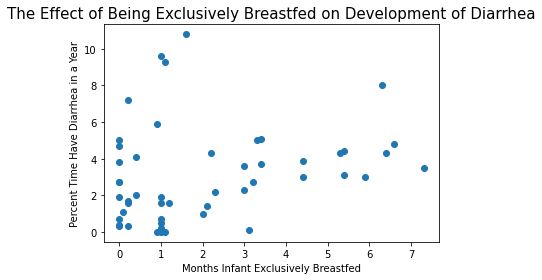

In [46]:
plt.scatter(x,y)
plt.xlabel("Months Infant Exclusively Breastfed")
plt.ylabel("Percent Time Have Diarrhea in a Year")
plt.title ("The Effect of Being Exclusively Breastfed on Development of Diarrhea",fontsize=15)
plt.show()

This plot is not necessarily showing the hypothesis that I had and wanted to be portrayed, but it does show an overall trend. If infant is exclusively breastfed for less months, then the range of the development of diarrhea extends further than non-exclusively breastfed infants. There is still infants who are exclusively breastfed that develop the same percentage of diarrhea in a year as those infants that are not exclusively breastfed, but these cases center around the 4% line, rather than centering around the 7% line in infants who are exclusively breastfed for less than 2 months. 

### Notes for POD

I had an individual meeting with Professor Schiffer last week and I changed a lot about the code that I had because the data was a limiting factor. First off, I changed my hypothesis to exclude the specific types of bacteria because there was no data to correspond with that fact. Also, I added the development of diarrhea because there was data to back up the onset of this problem. The deep neural network still has to be paired against another model to show that it accurately creates predictions, but this is the first starting point of the keras model. Finally, the scatterplot isn't necessarily showing what I wanted, but I think that the explanation shows that it still does what I want it do. 